In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# using pandas to read  the csv file
# change path according to your directory
filename = "C:/Users/User/PycharmProjects/auto1/data/Auto1-DS-TestData.csv"
auto_data = pd.read_csv(filename)
auto_data.head(5)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...    engine-size  \
0  convertible          rwd           front        88.6  ...            130   
1  convertible          rwd           front        88.6  ...            130   
2    hatchback          rwd           front        94.5  ...            152   
3        sedan          fwd           front        99.8  ...            109   
4        sedan          4wd           front        99.4  ...            136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [3]:
# the dataset contain a string '?'
# will replace the string with NAN
auto_data = auto_data.replace('?', np.nan)

In [4]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-nul

In [5]:
# normalizing column has 41 rows with missing value and also the column does not seem to have strong affect
# so we drop the column 
df= auto_data.drop('normalized-losses', axis=1)

# columns "horsepower, bore, stroke, peak RPM, Price should be considered as an numeric data"
# will convert these column to numeric data type
cols = ['bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)


In [6]:
# using pandas_profiling to explore the features of the data set 
pandas_profiling.ProfileReport(df)

In [7]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile="auto1_dataset.html")

In [8]:
"""
The following information was observed from the data set 
1.Sedan is the most common body style car followed by hatchback and wagon. Hardtop and convertible are not so common
2.Forward wheel car is more common followed by rear wheel drive cars. Four wheel car is relatively much less common 
3.Rear-engine cars are extremely uncommon.
4.The vast majority of cars have ohc engines.
5.Most of cars have a fuel type of mpfi followed by 2bbl the. All other types have less preferences.
6.Gas cars are more common than diesel cars.
7.Most cars have four cylinders, with very small frequencies for the other values.
8.4 doors and 2 doors cars does not have a huge difference among them  
9.Histogram of the Price column shows that the values are right-skewed that is most cars are in the lower range
10.From the correlation graph we can notice that 
    a) Highway mpg and city mpg are highly correlated
    b) Wheel base, Length, Width are highly correlated. 
11.Columns symboling, height, stroke, compress-ratio, peak-rpm can be removed since these factor that does not have a strong correlation with the price
12.attribute that has a stronger correlation with the price 
    a)Curb-Weight
    b)Engine-Size
    c)Horsepower
    d)Mpg(City / Highway mpg)
    e)Length/ Width


"""
# removing the unwanted coulmns 

auto_df= df.drop(columns=['symboling', 'height', 'wheel-base', 'length', 'stroke',
                          'compression-ratio', 'peak-rpm', 'highway-mpg'], axis=1)
auto_df.shape


(205, 17)

In [9]:
# looking for nan rows
auto_df[auto_df.isnull().any(axis=1)]
# since there are not many rows with nan so these can be ignored
auto_df = auto_df.dropna()

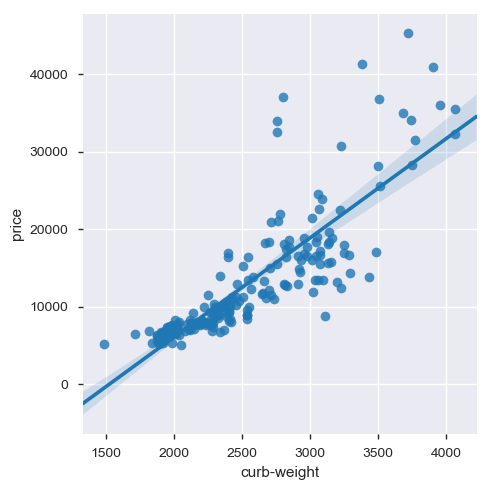

In [10]:
# plotting the numeric features with respect to price 
sns.lmplot(x= 'curb-weight' , y='price', data=auto_df)
plt.show()

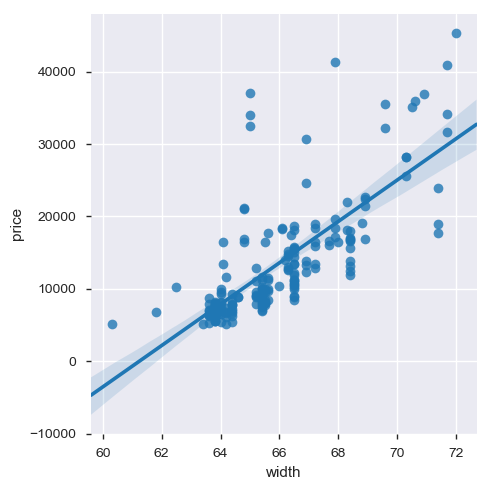

In [11]:
sns.lmplot(x= 'width' , y='price', data=auto_df)
plt.show()

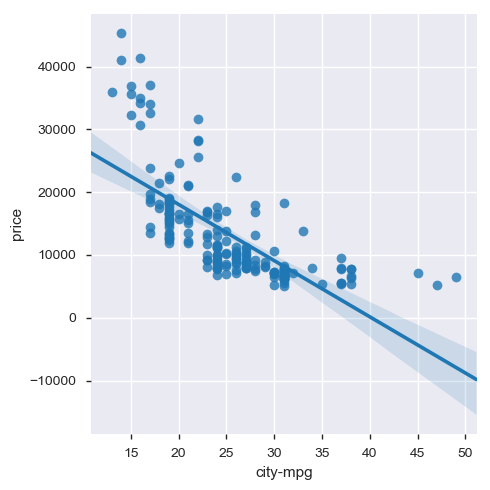

In [12]:
sns.lmplot(x= 'city-mpg' , y='price', data=auto_df)
plt.show()

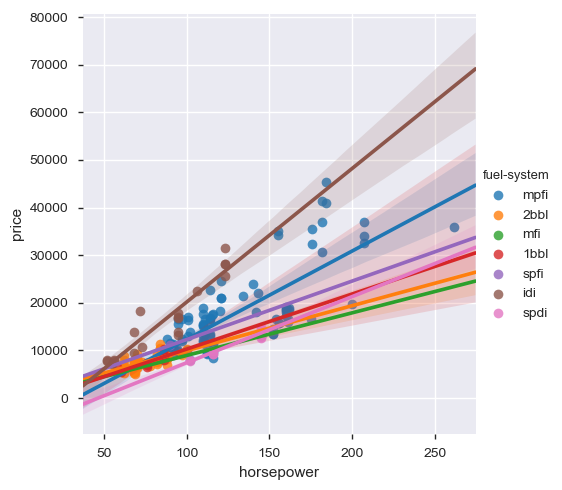

In [13]:
sns.lmplot(x= 'horsepower' , y='price',hue = 'fuel-system', data=auto_df)
plt.show()

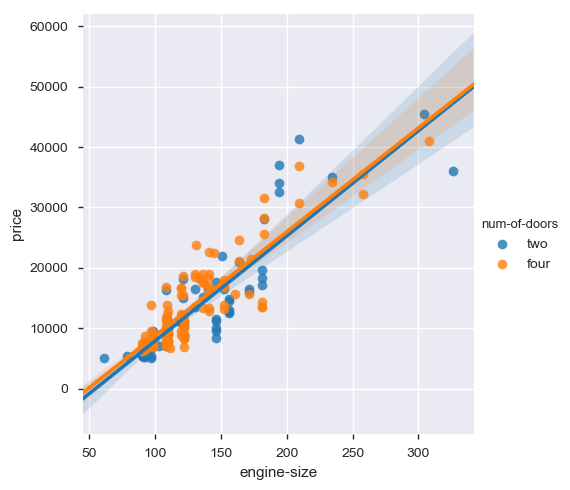

In [14]:
sns.lmplot(x= 'engine-size' , y='price', hue = 'num-of-doors', data=auto_df)
plt.show()

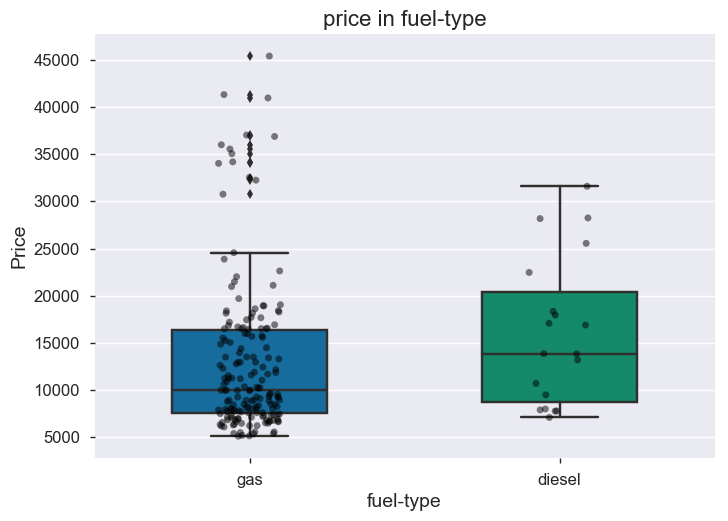

In [15]:
"""
The following information was observed 
1 increase in the horsepower, length, curb-weight, and engine-size cause an increase in the price, whereas with the increase
in city-mpg cause the decrease in price
"""
# seeing the price affect on categorical data 
# make boxplot with Seaborn

bplot=sns.boxplot(y='price', x='fuel-type', data=auto_df, width=0.5, palette="colorblind")
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(y='price', x='fuel-type', data=auto_df, jitter=True, marker='o', alpha=0.5, color='black')
 # bplot.set(yscale="log")
bplot.axes.set_title("price in fuel-type", fontsize=16)
bplot.set_xlabel("fuel-type", fontsize=14)
bplot.set_ylabel("Price", fontsize=14)
bplot.tick_params(labelsize=12)

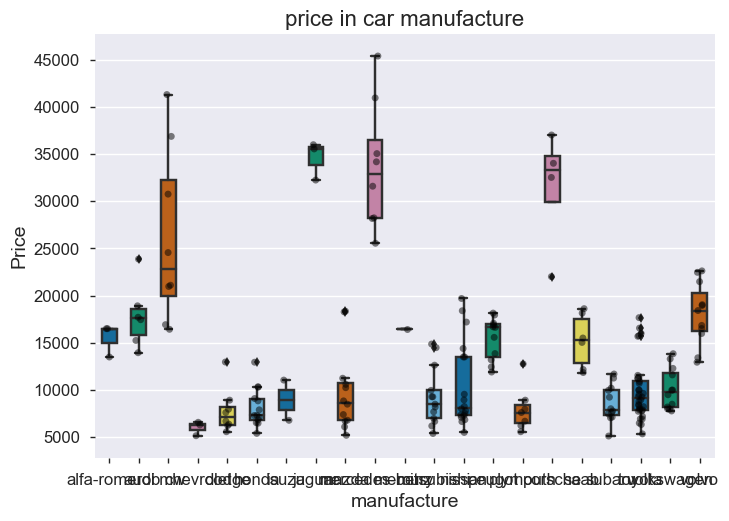

In [16]:
# make boxplot with Seaborn
bplot=sns.boxplot(y='price', x='make',  data=auto_df,  width=0.5, palette="colorblind")
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(y='price', x='make', data=auto_df, jitter=True, marker='o', alpha=0.5, color='black')
 # bplot.set(yscale="log")
bplot.axes.set_title("price in car manufacture", fontsize=16)
bplot.set_xlabel("manufacture", fontsize=14)
bplot.set_ylabel("Price", fontsize=14)
bplot.tick_params(labelsize=12)

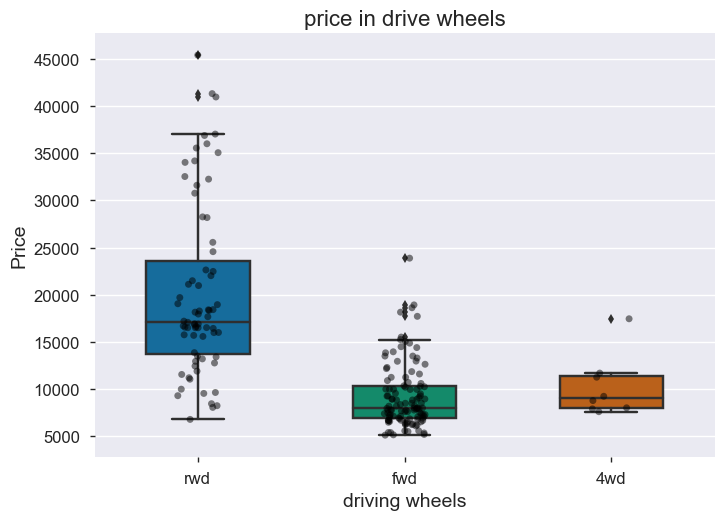

In [17]:
# make boxplot with Seaborn

bplot=sns.boxplot(y='price', x='drive-wheels', data=auto_df, width=0.5, palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(y='price', x='drive-wheels', data=auto_df, jitter=True, marker='o', alpha=0.5, color='black')
 # bplot.set(yscale="log")
bplot.axes.set_title("price in drive wheels", fontsize=16)
bplot.set_xlabel("driving wheels", fontsize=14)
bplot.set_ylabel("Price", fontsize=14)
bplot.tick_params(labelsize=12)

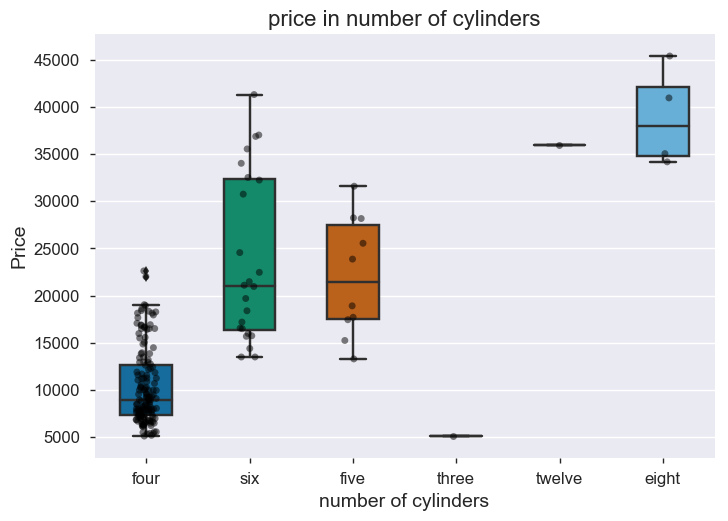

In [18]:
#  make boxplot with Seaborn
bplot=sns.boxplot(y='price', x='num-of-cylinders',  data=auto_df, width=0.5, palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(y='price', x='num-of-cylinders', data=auto_df, jitter=True, marker='o', alpha=0.5, color='black')
 # bplot.set(yscale="log")
bplot.axes.set_title("price in number of cylinders", fontsize=16)
bplot.set_xlabel("number of cylinders", fontsize=14)
bplot.set_ylabel("Price", fontsize=14)
bplot.tick_params(labelsize=12)

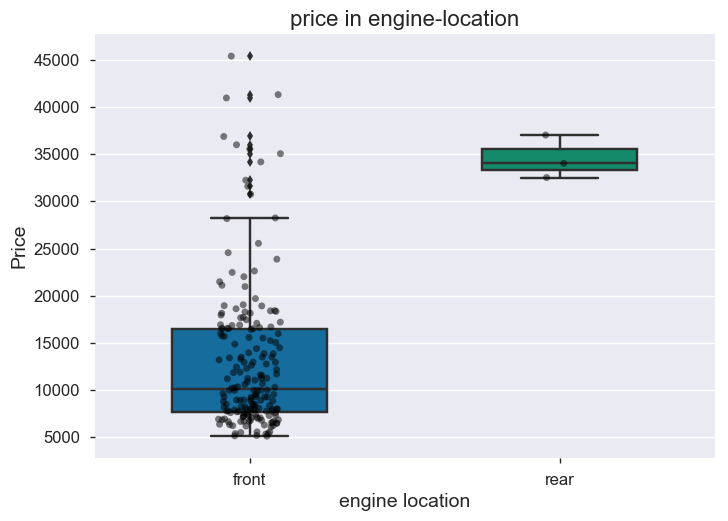

In [19]:
#  make boxplot with Seaborn
bplot=sns.boxplot(y='price', x='engine-location',  data=auto_df, width=0.5, palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(y='price', x='engine-location', data=auto_df, jitter=True, marker='o', alpha=0.5, color='black')
 # bplot.set(yscale="log")
bplot.axes.set_title("price in engine-location", fontsize=16)
bplot.set_xlabel("engine location", fontsize=14)
bplot.set_ylabel("Price", fontsize=14)
bplot.tick_params(labelsize=12)

In [20]:
"""
The box plots showed us that :-
1, There are a wider range of prices for gas cars than for diesel cars
2. There are very few manufacture eg (BMW, porsche, Jaquare) that creates an expensive cars, some manufactures dominate in 
mid-priced cars, and some in lower-priced cars.
3. Rear-wheel drive cars are more expensive than other types of car.
4.There are more number of cars with four cylinder and the price is less expensive compare to others. 
5 Rear-engine cars are more expensive than front-engine cars with small variation 
"""
"""
1. we can use linear regression model to predict the cost of the car. For linear regression the features should be in mumeric format
so we need to first convert some categorical features that we will use in numeric format

2. In order to train the model the data set can be divided into 80% training and 20% testing 

3. R^2 is used to test the acuracy of the model
"""

labelencoder = LabelEncoder()
for i in ['make','fuel-type','aspiration', 'num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']:
    auto_df[i] = labelencoder.fit_transform(auto_df[i])
auto_df.head(3)

make  fuel-type  aspiration  num-of-doors  body-style  drive-wheels  \
0     0          1           0             1           0             2   
1     0          1           0             1           0             2   
2     0          1           0             1           2             2   

   engine-location  width  curb-weight  engine-type  num-of-cylinders  \
0                0   64.1         2548            0                 2   
1                0   64.1         2548            0                 2   
2                0   65.5         2823            4                 3   

   engine-size  fuel-system  bore  horsepower  city-mpg    price  
0          130            4  3.47       111.0        21  13495.0  
1          130            4  3.47       111.0        21  16500.0  
2          152            4  2.68       154.0        19  16500.0

In [21]:
auto_df.corr()

make  fuel-type  aspiration  num-of-doors  body-style  \
make              1.000000  -0.124962    0.090727     -0.142520    0.083784   
fuel-type        -0.124962   1.000000   -0.431268      0.175294   -0.144006   
aspiration        0.090727  -0.431268    1.000000     -0.046026    0.065667   
num-of-doors     -0.142520   0.175294   -0.046026      1.000000   -0.681795   
body-style        0.083784  -0.144006    0.065667     -0.681795    1.000000   
drive-wheels     -0.013248  -0.151650    0.111810      0.086999   -0.142895   
engine-location   0.063241   0.041523   -0.059141      0.147758   -0.283051   
width            -0.009267  -0.245662    0.323643     -0.235345    0.157195   
curb-weight       0.013880  -0.227255    0.331855     -0.209849    0.145093   
engine-type       0.005229   0.117814   -0.114554      0.037573   -0.037616   
num-of-cylinders  0.027242   0.124910   -0.118151      0.099423    0.012188   
engine-size      -0.105584  -0.066091    0.109131      0.003019   -0.084032   
fuel-system       0.135215   0.132332    0.245997      0.025261   -0.078872   
bore              0.235857  -0.052378    0.247400     -0.127156    0.021433   
horsepower       -0.062452   0.156712    0.255771      0.097046   -0.134309   
city-mpg          0.053543  -0.242396   -0.205628      0.068485   -0.006719   
price            -0.165066  -0.115440    0.186073     -0.046460   -0.070059   

                  drive-wheels  engine-location     width  curb-weight  \
make                 -0.013248         0.063241 -0.009267     0.013880   
fuel-type            -0.151650         0.041523 -0.245662    -0.227255   
aspiration            0.111810        -0.059141  0.323643     0.331855   
num-of-doors          0.086999         0.147758 -0.235345    -0.209849   
body-style           -0.142895        -0.283051  0.157195     0.145093   
drive-wheels          1.000000         0.153819  0.494133     0.607016   
engine-location       0.153819         1.000000 -0.052672     0.050029   
width                 0.494133        -0.052672  1.000000     0.867640   
curb-weight           0.607016         0.050029  0.867640     1.000000   
engine-type          -0.169938         0.150967  0.080715     0.026598   
num-of-cylinders      0.155856         0.208439 -0.210868     0.006565   
engine-size           0.577970         0.199546  0.739903     0.857188   
fuel-system           0.436529         0.108891  0.484708     0.576494   
bore                  0.483190         0.189345  0.541633     0.645070   
horsepower            0.551539         0.343559  0.621532     0.762154   
city-mpg             -0.454564        -0.164217 -0.657153    -0.777763   
price                 0.596227         0.330848  0.754649     0.835368   

                  engine-type  num-of-cylinders  engine-size  fuel-system  \
make                 0.005229          0.027242    -0.105584     0.135215   
fuel-type            0.117814          0.124910    -0.066091     0.132332   
aspiration          -0.114554         -0.118151     0.109131     0.245997   
num-of-doors         0.037573          0.099423     0.003019     0.025261   
body-style          -0.037616          0.012188    -0.084032    -0.078872   
drive-wheels        -0.169938          0.155856     0.577970     0.436529   
engine-location      0.150967          0.208439     0.199546     0.108891   
width                0.080715         -0.210868     0.739903     0.484708   
curb-weight          0.026598          0.006565     0.857188     0.576494   
engine-type          1.000000         -0.059411     0.235608    -0.016845   
num-of-cylinders    -0.059411          1.000000     0.095495     0.086880   
engine-size          0.235608          0.095495     1.000000     0.497235   
fuel-system         -0.016845          0.086880     0.497235     1.000000   
bore                 0.089548         -0.014655     0.581854     0.467150   
horsepower           0.151334          0.261597     0.845325     0.677641   
city-mpg            -0.097928     

In [22]:
# create training and test data set
X = auto_df.drop('price',axis =1)
Y = auto_df['price']
# split the training and test data 
x_train, x_test, y_train,  y_test = train_test_split(X, Y,train_size=0.8, test_size=0.2, random_state=0)


In [23]:
# Fitting Multiple Linear Regression to the Training set
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)

In [24]:
model.score(x_train,y_train)

0.8752632783589518

In [25]:
model.score(x_test,y_test)

0.9317159887307656